In [15]:
import pandas as pd

c:\users\kobalaji\appdata\local\programs\python\python37-32\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


In [16]:
import numpy as np

In [17]:
data = pd.read_csv("Social_Network_Ads.csv")

In [18]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


In [20]:
from sklearn.preprocessing import LabelEncoder
lb  = LabelEncoder()

In [21]:
data['Gender'] = lb.fit_transform(data['Gender'])

In [22]:
data['Gender'].unique()

array([1, 0], dtype=int64)

In [23]:
X = data.drop("Purchased",axis=1)

In [24]:
y = data["Purchased"]

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc = StandardScaler()

In [27]:
X = sc.fit_transform(X)

In [28]:
X

array([[-0.93657932,  1.02020406, -1.78179743, -1.49004624],
       [ 1.66838653,  1.02020406, -0.25358736, -1.46068138],
       [-0.32087714, -0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.52039175, -0.98019606,  1.17910958, -1.46068138],
       [ 0.88695546,  1.02020406, -0.15807423, -1.07893824],
       [-1.36231017, -0.98019606,  1.08359645, -0.99084367]])

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dc = DecisionTreeClassifier()

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [33]:
x_train.shape

(320, 4)

In [34]:
x_test.shape

(80, 4)

In [35]:
dc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
from sklearn.tree import plot_tree

In [37]:
from matplotlib.pylab import rcParams

In [38]:
rcParams["figure.figsize"] = 20,20

[Text(451.4375, 1032.8400000000001, 'X[2] <= 0.463\ngini = 0.455\nsamples = 320\nvalue = [208, 112]'),
 Text(248.0, 924.1200000000001, 'X[3] <= 0.61\ngini = 0.254\nsamples = 228\nvalue = [194, 34]'),
 Text(93.0, 815.4000000000001, 'X[2] <= -0.11\ngini = 0.069\nsamples = 195\nvalue = [188, 7]'),
 Text(62.0, 706.6800000000001, 'gini = 0.0\nsamples = 136\nvalue = [136, 0]'),
 Text(124.0, 706.6800000000001, 'X[0] <= -1.565\ngini = 0.209\nsamples = 59\nvalue = [52, 7]'),
 Text(93.0, 597.96, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(155.0, 597.96, 'X[3] <= 0.081\ngini = 0.16\nsamples = 57\nvalue = [52, 5]'),
 Text(62.0, 489.24, 'X[0] <= 0.822\ngini = 0.048\nsamples = 41\nvalue = [40, 1]'),
 Text(31.0, 380.5200000000001, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(93.0, 380.5200000000001, 'X[2] <= -0.015\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(62.0, 271.80000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(124.0, 271.80000000000007, 'gini = 0.0\nsamples

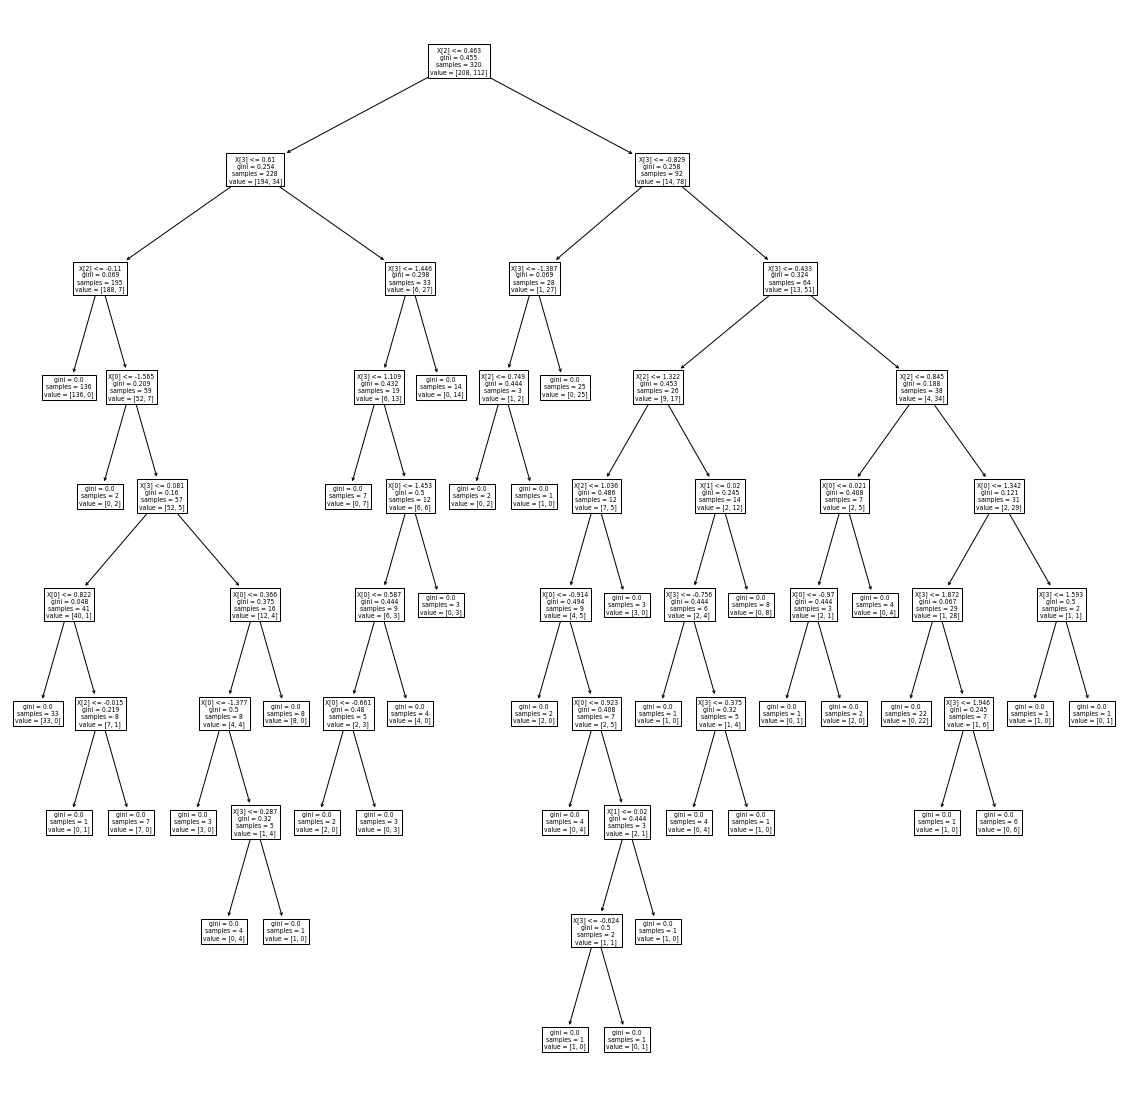

In [39]:
plot_tree(dc)

In [40]:
YPred= dc.predict(x_test)

In [41]:
YPred

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test, YPred)

0.825

If we need to loop MAx_depth  = 1 to 8 and Criteria =  Gini and Entropy 

Then we need GridSearchCV

In [50]:
param_dict = {
    'criterion':['gini', 'entropy'],
    'max_depth':[1,2,3,4,5,6,7,8,9,None]}

In [51]:
param_dict

{'criterion': ['gini', 'entropy'],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, None]}

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
grid = GridSearchCV(dc,param_grid=param_dict, cv=10,n_jobs=-1)

In [54]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [55]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [56]:
grid.best_score_

0.9125

In [58]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [62]:
dc_1 = DecisionTreeClassifier(criterion= 'gini',max_depth= 2)

In [63]:
dc_1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [66]:
YPred_1 = dc_1.predict(x_test)

In [67]:
accuracy_score(y_test,YPred_1)

0.9125